In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import geoopt
import torch

In [19]:
from embedders.manifolds import Manifold, ProductManifold

In [16]:
m_h = Manifold(-1, 4)
m_h.sample([[1, 0, 0, 0, 0] * 3])

tensor([[ 2.2849, -0.5859,  1.6338,  0.9772,  0.5029],
        [ 1.6457, -0.9557, -0.3535, -0.1225,  0.8093],
        [ 4.7720,  3.4594, -0.5343,  1.7630,  2.5321]], grad_fn=<CatBackward0>)

In [17]:
m_e = Manifold(0, 4)
m_e.sample([[1, 0, 0, 0] * 3])

tensor([[ 1.7235, -0.6360,  0.4456, -0.0810],
        [ 1.0018, -1.3092,  1.0234, -0.6134],
        [ 2.1614, -0.3236, -1.0664, -1.8495]], grad_fn=<AddBackward0>)

In [18]:
m_s = Manifold(1, 4)
m_s.sample([[1, 0, 0, 0, 0] * 4])

tensor([[ 0.5102,  0.4406, -0.1001,  0.2622,  0.6832],
        [ 0.0137,  0.8437, -0.2401, -0.0354,  0.4786],
        [-0.5245,  0.0772, -0.7636, -0.0901,  0.3573],
        [-0.4359, -0.7195,  0.1660, -0.1932, -0.4769]],
       grad_fn=<WhereBackward0>)

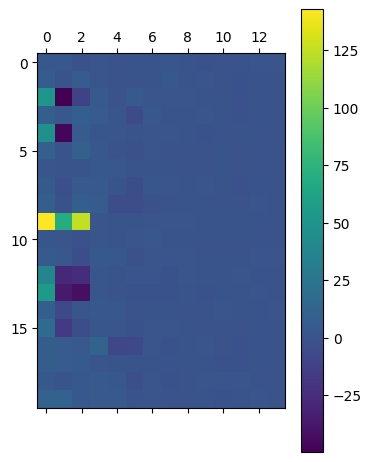

In [29]:
import matplotlib.pyplot as plt

signature = [(-2, 2), (-1, 2), (0, 2), (1, 2), (2, 2)]
pm = ProductManifold(signature)

z_sample = pm.sample([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0] * 20)

plt.matshow(z_sample.detach().numpy().reshape(20, 14))
plt.colorbar()
plt.show()

-2
-1.0
-0.5
0
0.5
1.0
2.0


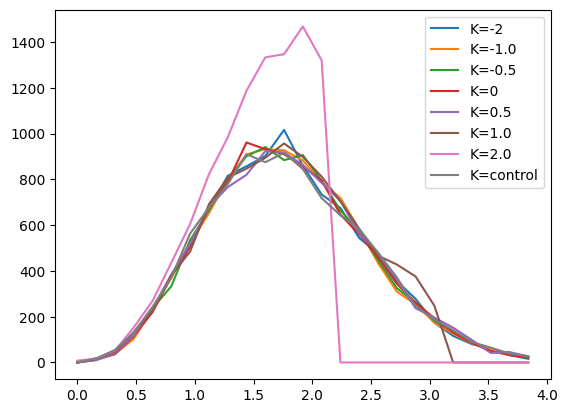

In [122]:
# Sanity check: can we get the right distribution of samples for different scales?

N_SAMPLES = 10_000

all_dists = {}
for K in [-2, -1.0, -0.5, 0, 0.5, 1.0, 2.0]:
    print(K)
    m = Manifold(K, 4)
    samples = m.sample(torch.cat([m.mu0] * N_SAMPLES, dim=0))
    dists = m.dist(m.mu0, samples)
    all_dists[K] = dists

all_dists["control"] = torch.norm(torch.randn(size=(N_SAMPLES, 4)), dim=1)

# Get histograms with torch and line-plot them
for K, dists in all_dists.items():
    dist_hist = torch.histogram(dists, bins=25, range=(0, 4))
    plt.plot(dist_hist.bin_edges[:-1].detach().cpu().numpy(), dist_hist.hist.detach().cpu().numpy(), label=f"K={K}")
plt.legend()

# Great, this looks right: all distances match, except where we totally run out of space on our manifold
# (e.g. K=2; K=1 is starting to curve off a little bit near d=pi...)